<a href="https://colab.research.google.com/github/SonolaMoyo/HamoyeSummer2022/blob/main/neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#create circles
X, y = make_circles(n_samples, noise=0.01, random_state=42)

In [3]:
#check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
#check out the features
X

array([[ 0.76628562,  0.21627572],
       [-0.77828546,  0.13782611],
       [-0.80092515,  0.12460507],
       ...,
       [-0.14557015, -0.79389048],
       [ 0.67981859, -0.74181293],
       [ 0.28369839,  0.96028934]])

In [5]:
#make a dataset of features and labels
import pandas as pd
circles = pd.DataFrame({"XO":X[:, 0], "X1":X[:, 1], "label":y})
circles.head(5)

,XO,X1,label
0,0.766286,0.216276,1
1,-0.778285,0.137826,1
2,-0.800925,0.124605,1
3,-0.358326,0.713535,1
4,0.438813,-0.898511,0


In [6]:
#check out the different labals
#Binary classification
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

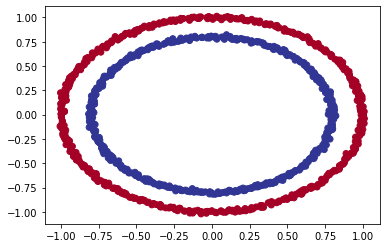

In [7]:
#visualise with a plot
# 2 axis X0 X1
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### Input and output shapes

In [8]:
#view the first sample of features and label
X[0], y[0]

(array([0.76628562, 0.21627572]), 1)

### Steps in modelling

In [9]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model (same as model_1 but with extra layer)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1), #add an extra layer
                               tf.keras.layers.Dense(1)])

In [10]:
#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

In [11]:
#3. fit the model
model_1.fit(X, y, epochs=100, verbose=1) #set verbose=0 to make the output less

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 1.3878 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7151 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5010
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4950
Epoch 11/

### Improving a model
methods: Adding layers<br>
         Increasing the number of hidden units<br>
         Changing the activation functions<br>
         Change the optimization function<br>
         Change the learning rate<br>
         Fitting on more data<br>
         Fitting for longer<br>

In [12]:
# 1. Adding more layers
# Set random seed
tf.random.set_seed(42)

#1. Create the model (same as model_1 but with extra layer)
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100), # add 100 dense neurons
                               tf.keras.layers.Dense(10), # add another layer with 10 neurons
                               tf.keras.layers.Dense(1)])
#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])
#3. fit the model
model_3.fit(X, y, epochs=100, verbose=1) #set verbose=0 to make the output less

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9958 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5300
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4930
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5170
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4670
Epoch 11/

The model doesn;t improve after adding more layer with high neurons. Next we visualize the dataset to know whats going on

In [13]:
import numpy as np
def plot_decision_boundary(model, X, y):
  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  #create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  #make predictions using the trained model
  y_pred = model.predict(x_in)

  #Check for multi-class
  if model.output_shape[-1]>1:  #checks the final dimension of the model's output shape, if >1 it;s multi-class
    print("doing multiclass classification...")
    #reshaping predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classificaiton")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  #plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classificaiton


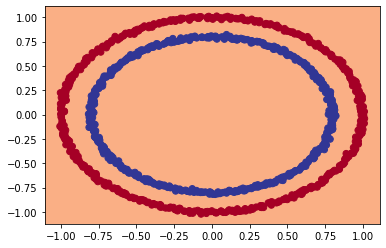

In [14]:
#check the model prediction
plot_decision_boundary(model_3, X, y)

### The missing piece: Non-linearity <br>
The main change we'll add to models we've built before is the use of the activation keyword

In [17]:
#Set the random seed 
tf.random.set_seed(42)

#create a model
model_6 = tf.keras.Sequential([tf.keras.layers.Dense(4, tf.keras.activations.relu), #hidden layer 1, 4 neurons, ReLu activation 
                               tf.keras.layers.Dense(4, tf.keras.activations.relu),#hidden layer 2, 4 neurons, ReLu activation
                               tf.keras.layers.Dense(1)]) #output layer

#compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #Adams's default learning rate is 0.001
                metrics=['accuracy'])

#fit the model
model_6.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

doing binary classificaiton


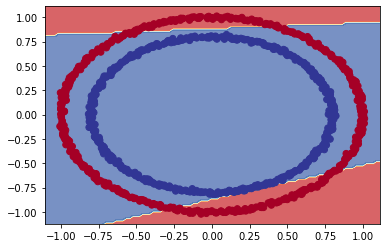

In [18]:
plot_decision_boundary(model_6, X, y)

Adding the sigmoid output

In [19]:
#Set the random seed 
tf.random.set_seed(42)

#create a model
model_7 = tf.keras.Sequential([tf.keras.layers.Dense(4, tf.keras.activations.relu), #hidden layer 1, 4 neurons, ReLu activation 
                               tf.keras.layers.Dense(4, tf.keras.activations.relu),#hidden layer 2, 4 neurons, ReLu activation
                               tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)]) #output layer, sigmoid activation

#compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #Adams's default learning rate is 0.001
                metrics=['accuracy'])

#fit the model
model_7.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5180
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5330
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5350
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5350
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5460
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.5470
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5510
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5490
Epoch 11/

doing binary classificaiton


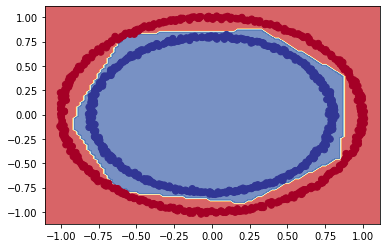

In [20]:
#viewing the prediction
plot_decision_boundary(model_7, X, y)

### Evaluating and improving our classification model

In [23]:
#split our data into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

#check the shape of the data
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [28]:
#Set the random seed 
tf.random.set_seed(42)

#create a model
model_8 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='relu'), #hidden layer 1, 4 neurons, ReLu activation 
                               tf.keras.layers.Dense(4, tf.keras.activations.relu),#hidden layer 2, 4 neurons, ReLu activation
                               tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)]) #output layer, sigmoid activation

#compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #Adams's default learning rate is 0.001
                metrics=['accuracy'])

#fit the model
model_8.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5400
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5537
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5487
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5675
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5813
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.5875
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6950
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.7337
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7538
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7575
Epoch 11/25
25/25 [

In [29]:
#evaluate the model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 1.0000
Model loss on the test set: 0.10013549774885178
Model accuracy: 100.00%
